In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Discrete time models for ecological populations

In this exercise we will use difference equations of the form $N(t+1) - N(t) = f\left( N(t) \right)$ to model ecological populations. Such equations are the discrete time form of _differential_ equations that you'll learn about in calculus (if you haven't already).  Along the way we will also use graphical stability analysis to understand if the equilibrium points of different mdoels are stable or unstable.

### Exponential growth

Perhaps the simplest model of a population is one that involves only the net reproduction rate (i.e., reproduction - mortality) of a species.  This can be represented by the following difference equation:

$$
N(t+1) - N(t) = r N(t)
$$

Note that this difference equation is a _linear_ equation of N(t), in that N(t) appears with just a constant coefficient in front of it.  To numerically simulate this model, however, we'll re-write this difference equation as a _recursion equation_:

$$
N(t+1) = N(t) + r N(t)
$$

As can be demonstrated below, there are only two possible outcomes with such a model: extinction or exponential growth! 

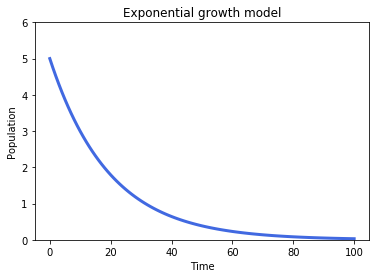

In [3]:
numsteps = 100  # simulation length in time steps
Nt = np.zeros(numsteps+1)  # array to store population numbers

Nt[0] = 5  # initial condition: population at t=0
r = -0.05  # net reproduction rate

for t in range(numsteps):
    Nt[t+1] = Nt[t] + r*Nt[t]  # recasting the difference equation as a recursion equation


plt.plot(Nt, linewidth=3, color='RoyalBlue')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Exponential growth model')
plt.ylim(0,round(np.max(Nt))+1)
plt.show()

**Your turn:** Try varying the parameter $r$ above to see which values of this parameter correspond to which outcome.

### The logistic model

The model above is so simple that it fails to capture the basic behavior of most populations.  One (incredibly popular) model that is a bit more realistic is the logistic model.  In this model the population is assumed to reproduce at a rate $r$ per individual, and the environment is able to support a population of size $K$ (also known as the carrying capacity). The model itself is given by:

$$
N(t+1) - N(t) = r N(t) \left(1 - \frac{N(t)}{K}\right)
$$

Note that this model is _nonlinear_ in $N(t)$, as the right hand side contains a term proportional to $\left(N(t)\right)^2$. 

As before, we'll re-write this difference equation as a recursion equation when we implement it in code.  We'll also define a function to calculate the right side of the difference equation. Finally, we'll simulate the model for 100 time steps using the initial condition $N(0) = 5$ and parameters $\{r, K\} = \{0.1, 12\}$.

In [4]:
def LogiModelDiff(N, par):
    '''Given N(t) this function returns DeltaN for 
    the logistic model. The vector par contains the
    parameters r and K (in that order).'''
    r = par[0]
    K = par[1]
    return r*N*(1 - N/K)

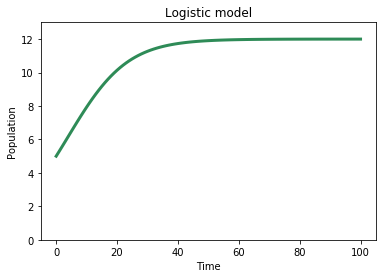

In [5]:
numsteps = 100  # simulation length in time steps
Nt = np.zeros(numsteps+1)  # array to store population numbers

Nt[0] = 5  # initial condition: population at t=0
modelparams = [0.1, 12]  # model parameters: [r, K]

for t in range(numsteps):
    Nt[t+1] = Nt[t] + LogiModelDiff(Nt[t], modelparams)
    

plt.plot(Nt, linewidth=3, color='SeaGreen')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic model')
plt.ylim(0,round(np.max(Nt))+1)
plt.show()

**Your turn:** Run the logistic model again in the cell below, but with a different initial population, $N(0) = 25$.  What is the population at $t = 100$?  How does this result compare to the first model run above?

Hopefully you have observed that $N(t)$ evolves toward $K$ as $t \rightarrow \infty$, regardless of the initial condition $N(0)$. Is there a simple way that we could explain this behavior?

Yes! Let's look at a graph of $\Delta N$ vs. $N$, where 

$$
\Delta N = r N \left(1 - \frac{N}{K}\right)
$$

Luckily we have already defined a function that can calculate $\Delta N$ for any value of $N$!

In [ ]:
possibleN = np.linspace(start=0, stop=15, num=100)  # grid of possible N values

plt.plot(possibleN, LogiModelDiff(possibleN, modelparams), 
         linewidth=3, color='Tomato')
plt.plot([0,15],[0,0],'--', color='SkyBlue')
plt.xlabel(r'$N$')
plt.ylabel(r'$\Delta N$')
plt.show()

Notice that the difference in population $\Delta N$: 
1. Is zero when the population is zero (i.e., an extinct population can't spontaneously come into being!); 
2. Increases as $N$ increases...up to some point; 
3. Begins to decrease after that point, crossing zero at $N = K$;
4. Is negative for all larger values of $N$.

**Group discussion**: What does this imply about the _stability_ of the model about the equilibrium point $N = K$?

### Your turn: the Ricker model

A slightly more sophisticated population model is the Ricker model, which models the interaction of the population with its environment in a less "gentle" way than the logistic model:

$$
N(t+1) - N(t) = (e^{r(1 - N(t)/K)} - 1)N(t)
$$

1. Create a function `RickerModelDiff` that takes the current value $N(t)$ and returns the difference value $(e^{r(1 - N(t)/K)} - 1)N(t)$.
2. Simulate this model for 100 time steps using the initial condition $N(0) = 140$ and parameters $\{r, K\} = \{0.1, 12\}$.  Plot your result!
3. **If you have time:** Create a plot of $\Delta N$ vs. $N$ and determine if the non-zero equilibrium point of this model is stable.